# nous avons des données d'applications mobiles qui appartiennent à une entreprise, comme la plupart des données d'entreprises connues sont privées , cet ensemble de données est généré, mais la distribution, le modèle et la relation entre les entités ne sont pas aléatoires.
- Les données contiennent des informations sur les clients, nous nous concentrons dans ce cas sur les colonnes inscrites(enrolled),
- Notre objectif est de créer un modèle capable de prédire si un client va s'inscrire au service d'abonnement de l'entreprise. 
- afin que l'entreprise puisse cibler les clients les moins susceptibles de s'abonner au service de l'entreprise, avec un courrier électronique ou une notification expliquant pourquoi elle devrait utiliser les fonctionnalités de ses services Premium ...

# import data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [9]:
sns.set(rc={'figure.figsize':(16,9)} ,font_scale=1.5 , palette='viridis' , style='whitegrid' )

In [10]:
df = pd.read_csv('appdata10.csv')
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


nous avons 11 colonnes
- users : identifiant du client
- first_open: la première date à laquelle notre client ouvre l'application
- dayofweek: le jour de la semaine auquel le client se joint
- hour: l'heure à laquelle ils rejoignent
- age: âge du client
- screen_list: pour les écrans ou les pages visionnées par le client dans l'application
- numscreens: nombre d'écrans ou de pages que custumer a vu
- mini-game: indique si un client joue un mini-jeu ou non
- used_premium_feature: indique si un client utilise une fonctionnalité premium ou non
- enrolled: indiquez si un client est inscrit
- enrolled_date: affiche la date d'inscription
- liked: si un client aime une fonctionnalité

# EDA

In [11]:
df['hour'] = df['hour'].str.slice(1,3).astype(int)

convert hour columns to numeric 

In [12]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


## Distribution

In [13]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


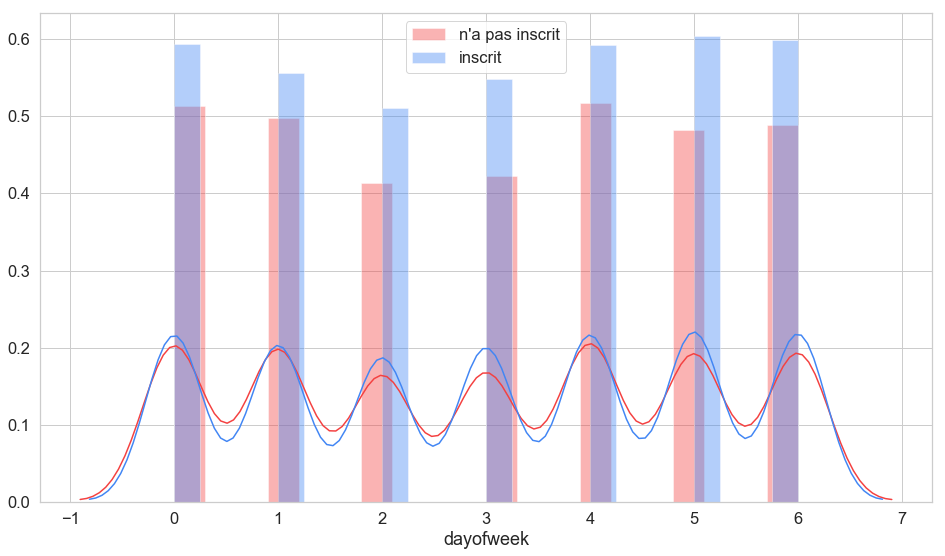

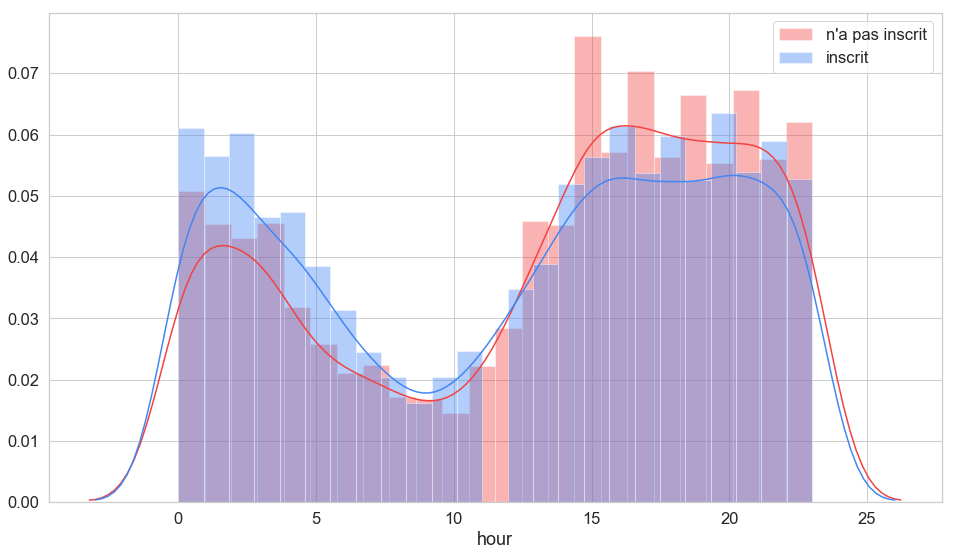

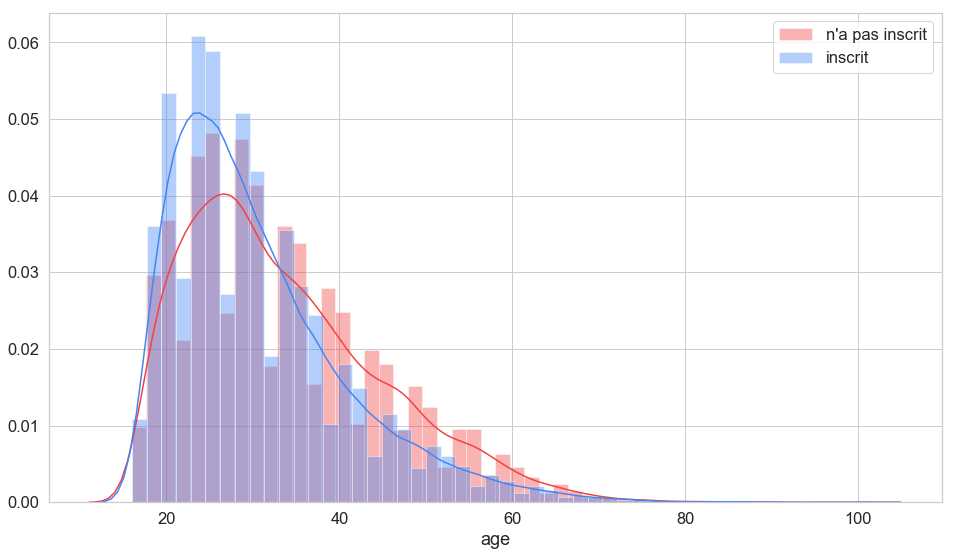

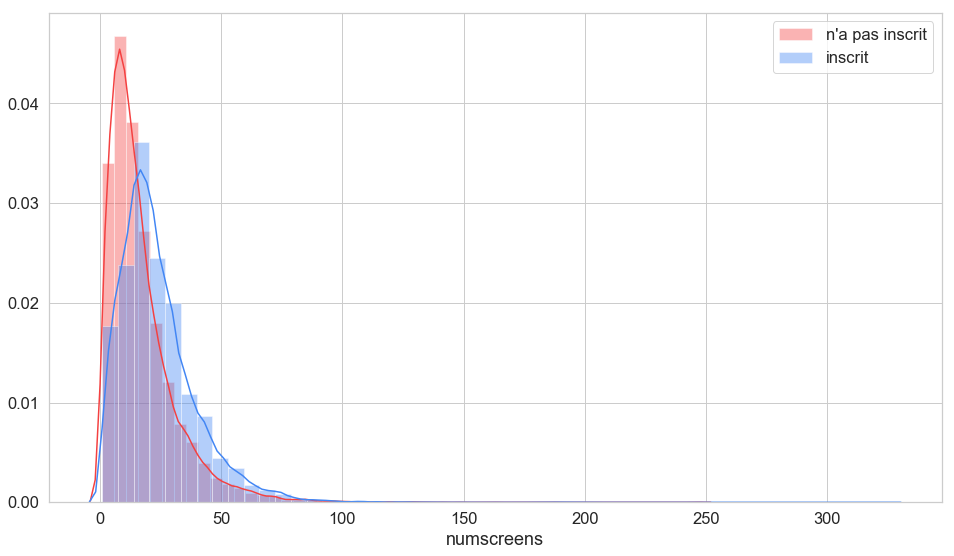

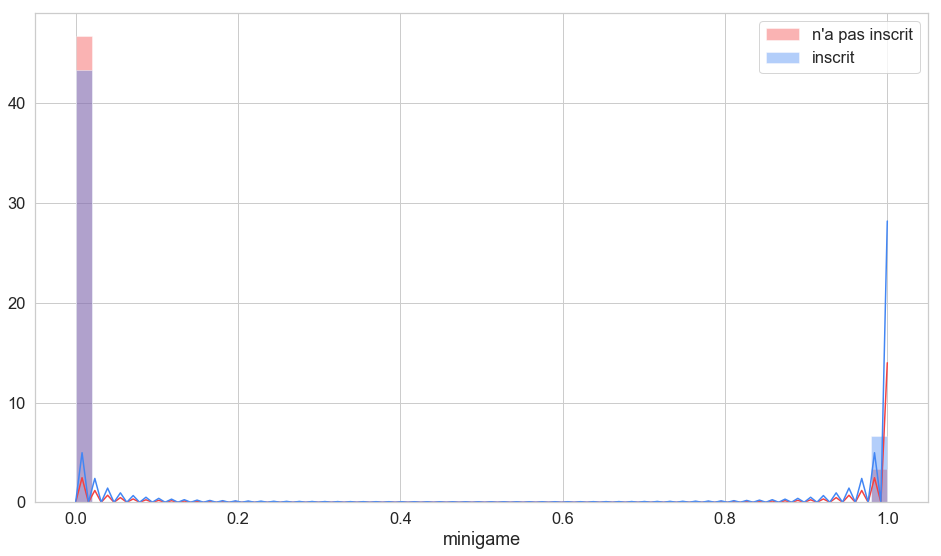

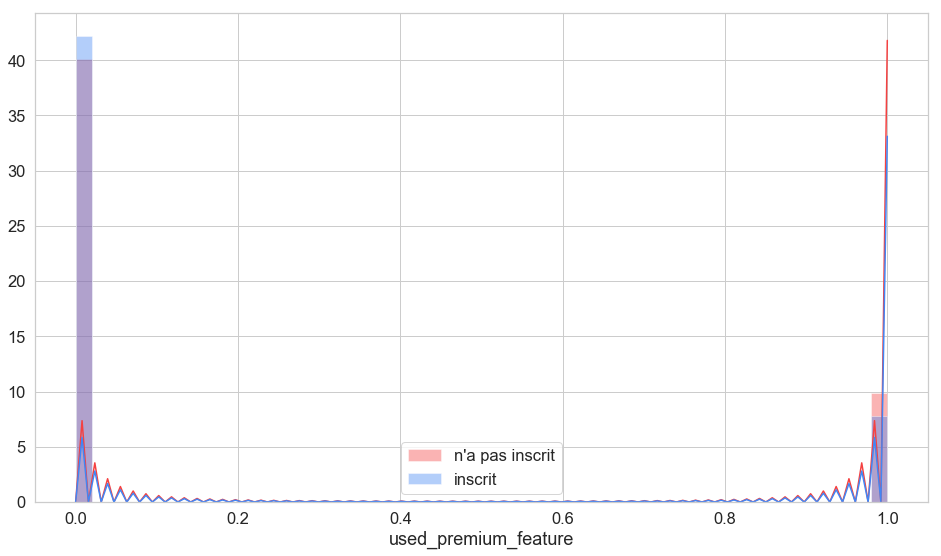

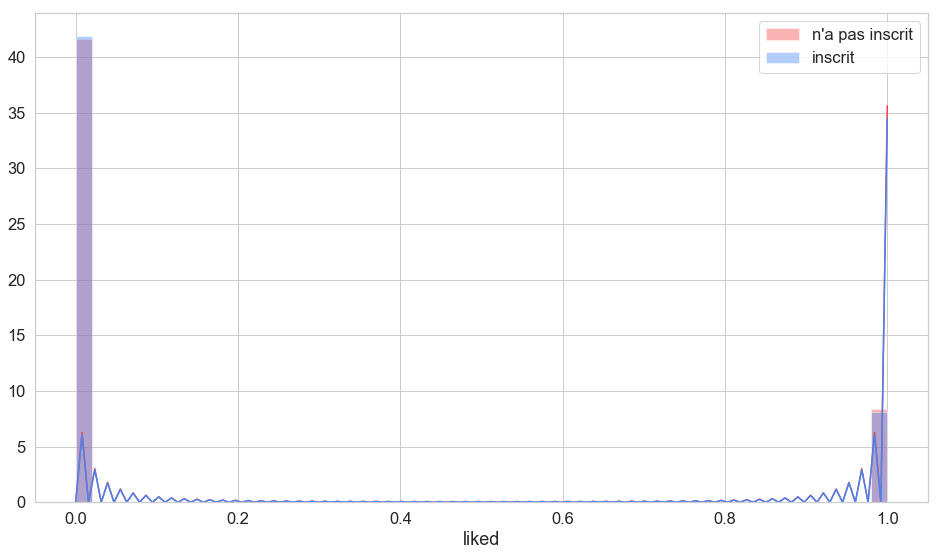

In [14]:
f= ['dayofweek','hour','age','numscreens','minigame','used_premium_feature','liked']
for i in f:
    sns.distplot(df[df['enrolled']==0][i] , color='#f44141' , label="n'a pas inscrit")
    sns.distplot(df[df['enrolled']==1][i], color='#4286f4', label="inscrit")
    plt.legend()
    plt.show()

    

## corrélation de chaque entité avec les colonnes inscrites

### ce que nous pouvons remarquer sur ce graphique est que plus l'âge est élevé, moins le client est susceptible de s'inscrire, et c'est un peu normal, car les personnes plus âgées ont plus d'expérience et n'ont pas besoin d'une application pour gérer leurs finances,
### et aussi plus les écrans visités, plus le client sera susceptible de s'inscrire

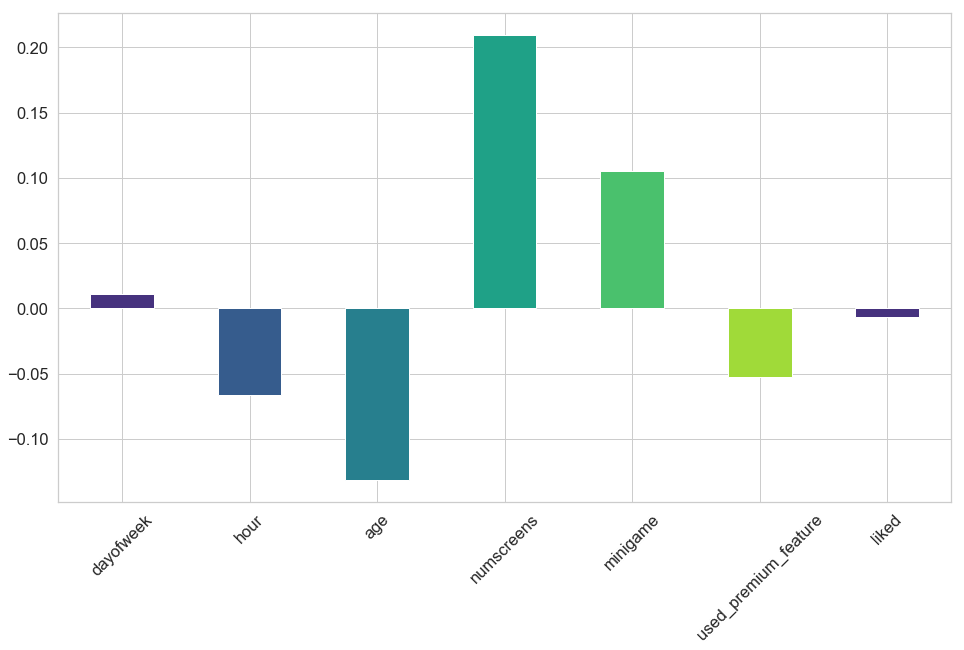

In [15]:
df.drop(['enrolled' , 'user'] , 1).corrwith(df['enrolled']).plot.bar(rot=45)

## matrice de corrélation complète

In [16]:
df.corr()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
user,1.000000,-0.002620,-0.012301,-0.003481,0.000058,0.006556,0.004130,-0.000519,0.007473
dayofweek,-0.002620,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737
hour,-0.012301,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.066694,-0.001725
age,-0.003481,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593
numscreens,0.000058,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,0.209457,-0.007349
minigame,0.006556,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,0.104979,-0.012250
used_premium_feature,0.004130,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,-0.052703,0.001690
enrolled,-0.000519,0.011326,-0.066694,-0.131303,0.209457,0.104979,-0.052703,1.000000,-0.007022
liked,0.007473,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,-0.007022,1.000000


In [17]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


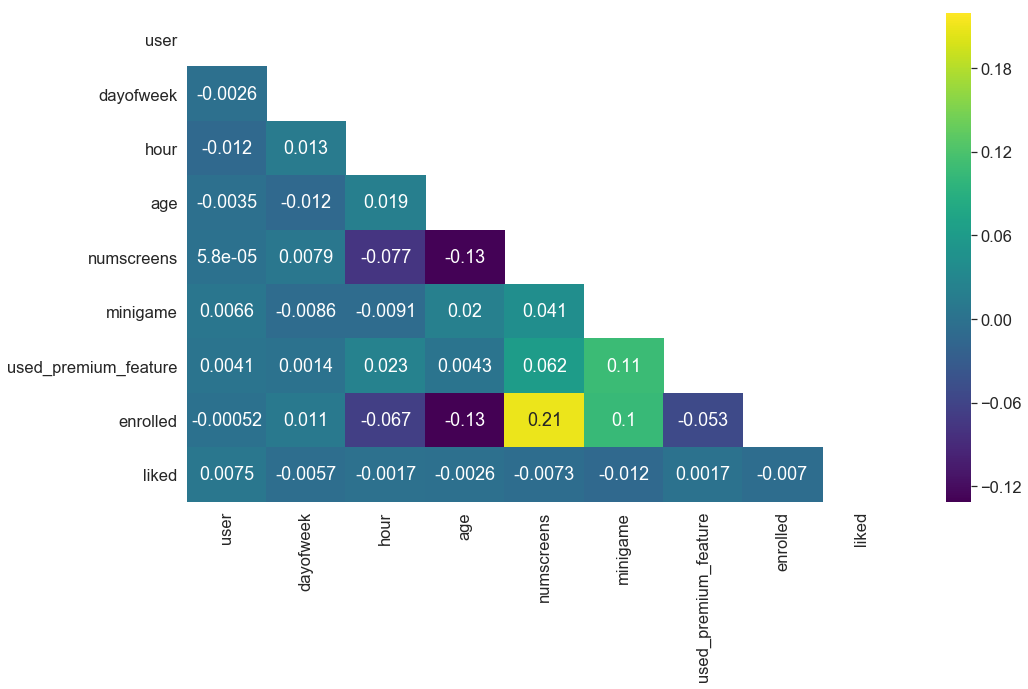

In [18]:
sns.heatmap(df.corr() , annot=True , mask=mask , cmap='viridis' , vmax=.22 , fmt='.2g')

In [19]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


# Voyons combien de temps il y a entre l'installation de l'application et l'inscription de chaque client


In [20]:
from datetime import datetime

In [21]:
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])
df['first_open'] = pd.to_datetime(df['first_open'])

## now we can create 2 new columns , the first one is difference betwen enroll and first app install ,and second is same but in term of hours .

In [22]:
df['difference'] = (df['enrolled_date'] - df['first_open'])
df['difference_in_hour'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')

In [23]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference,difference_in_hour
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,00:03:03.159000,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,00:05:49.180000,0.0


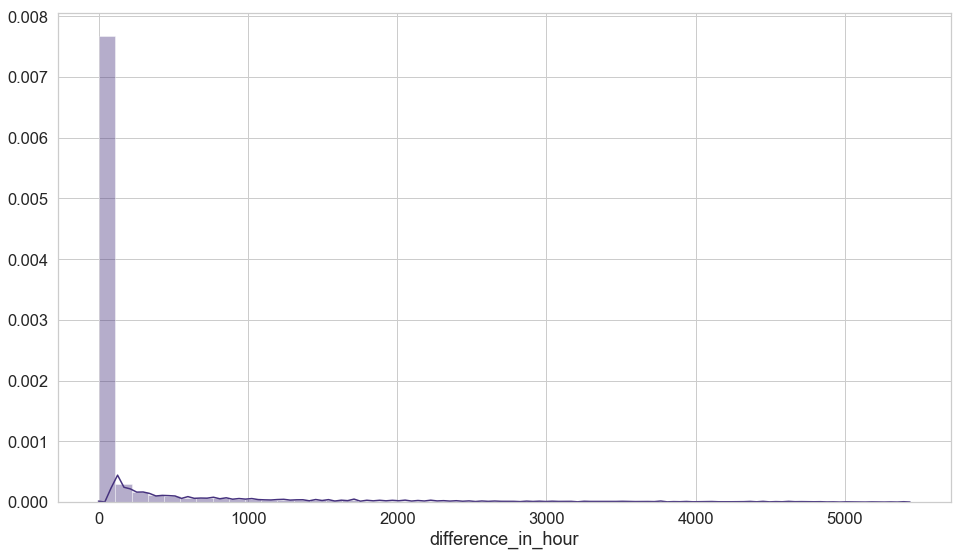

In [24]:
sns.distplot(df['difference_in_hour'].dropna())

In [25]:
df['difference_in_hour'].value_counts().head(10)

0.0     20885
1.0       625
2.0       337
3.0       207
4.0       159
6.0       133
5.0       129
24.0      129
7.0       109
8.0       108
Name: difference_in_hour, dtype: int64

## il semble que 20000 clients inscrits en moins d'une heure après avoir installé l'application

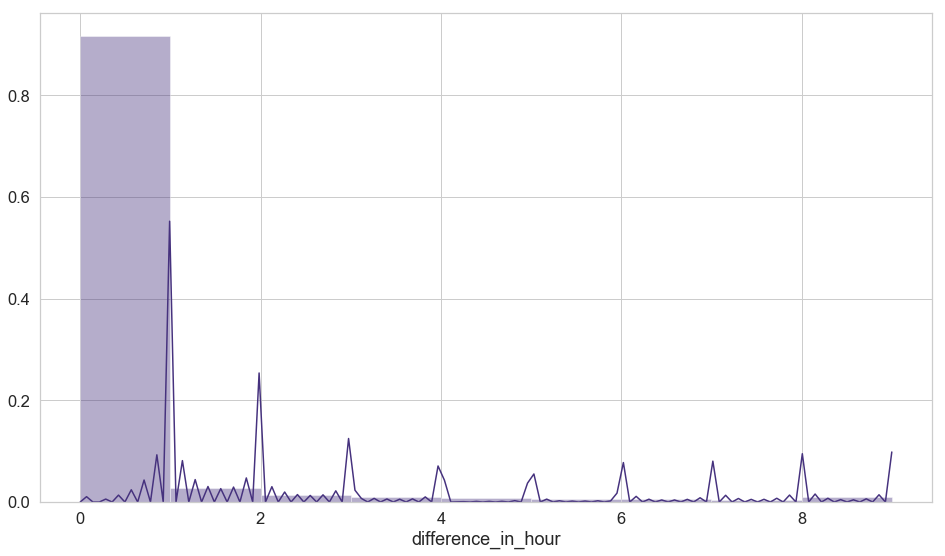

In [26]:
sns.distplot(df[df['difference_in_hour'] < 10]['difference_in_hour'] , bins=9)

In [27]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference,difference_in_hour
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,00:03:03.159000,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,00:05:49.180000,0.0


In [28]:
df['enroll_hour'] = df['enrolled_date'].apply(lambda x : x.hour)
df['enroll_day'] = df['enrolled_date'].apply(lambda x : x.dayofweek)
df['enroll_month'] = df['enrolled_date'].apply(lambda x : x.month)

In [29]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference,difference_in_hour,enroll_hour,enroll_day,enroll_month
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT,NaN,NaN,NaN,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT,NaN,NaN,NaN,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT,NaN,NaN,NaN,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,00:03:03.159000,0.0,16.0,4.0,7.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,00:05:49.180000,0.0,18.0,1.0,2.0


In [30]:
dmap = { 0:'Lundi' , 1:'Mardi' , 2:'Mercredi' , 3:'Jeudi' , 4:'Vendredi' , 5:'Samedi' , 6:'Dimanche'  }
df['enroll_day'] = df['enroll_day'].map(dmap)

In [31]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference,difference_in_hour,enroll_hour,enroll_day,enroll_month
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT,NaN,NaN,NaN,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT,NaN,NaN,NaN,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT,NaN,NaN,NaN,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,00:03:03.159000,0.0,16.0,Vendredi,7.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,00:05:49.180000,0.0,18.0,Mardi,2.0


## montant total du client inscrit par jour et heure

In [32]:
d_h = df[df['enrolled'] == 1 ].groupby(['enroll_hour','enroll_day'])['enrolled'].sum().unstack()

In [33]:
d_h.head()

enroll_day,Dimanche,Jeudi,Lundi,Mardi,Mercredi,Samedi,Vendredi
enroll_hour,,,,,,,
0.0,296,225,268,248,189,283,243
1.0,261,186,233,246,201,260,252
2.0,293,208,237,261,228,268,265
3.0,216,163,191,183,158,163,177
4.0,185,187,204,223,148,203,180


**nous remarquons que dimanche a le montant le plus inscrit, et les clients sont moins susceptibles de s'inscrire entre 03h00 et 11h00**

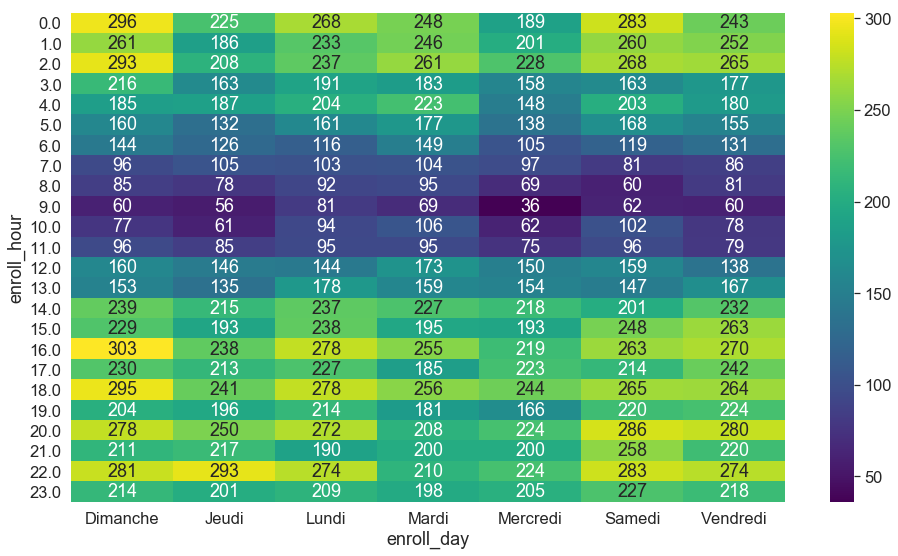

In [34]:
sns.heatmap(d_h  , annot=True , fmt='g' , cmap='viridis' )

**même chose pour le mois et le jour de la semaine**

In [35]:
m_h = df[df['enrolled'] == 1 ].groupby(['enroll_month','enroll_day'])['enrolled'].count().unstack()

In [36]:
m_h.head()

enroll_day,Dimanche,Jeudi,Lundi,Mardi,Mercredi,Samedi,Vendredi
enroll_month,,,,,,,
1.0,302,522,357,434,425,294,230
2.0,726,667,657,658,594,658,729
3.0,869,569,645,574,535,818,841
4.0,629,485,664,644,517,595,536
5.0,848,843,789,796,735,812,976


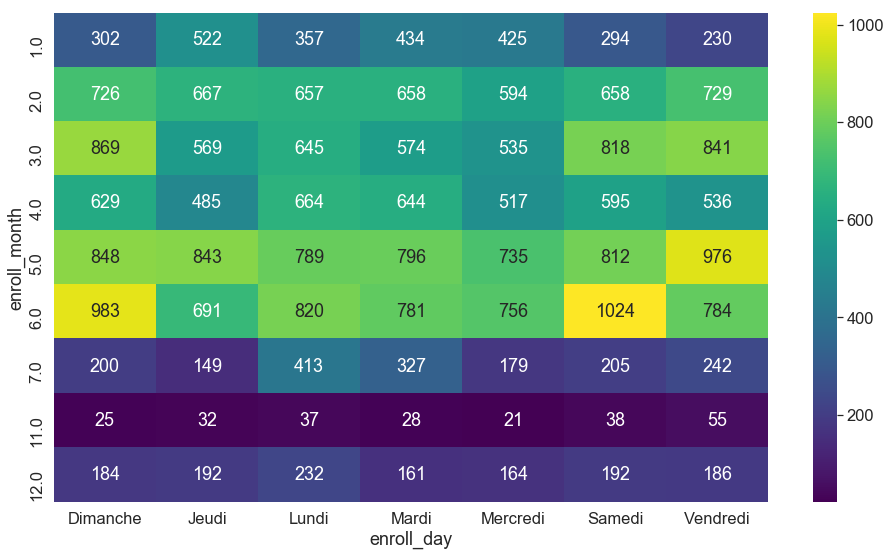

In [37]:
sns.heatmap(m_h  , annot=True , fmt='g' , cmap='viridis' )

## dans la parcelle de distribution où nous montrons la différence d'heure entre la première installation et l'heure inscrite, nous avons vu qu'il y avait une grande plage allant de 0 heure à 6000 heures,
## pour aider l'entreprise à trouver la meilleure stratégie, nous devons changer la valeur des colonnes de clients inscrits ayant plus de 48 heures (2 jours) de 1 à 0,
## de sorte que nous ne sommes partis qu'avec des personnes qui s'inscrivent rapidement, de sorte que l'algorithme étudie leur comportement

In [38]:
df.loc[df['difference_in_hour']>48 ,'enrolled']=0

In [39]:
df = df.drop(columns=['first_open' , 'enrolled_date' ,'difference_in_hour' ,'difference_in_hour','enroll_hour','enroll_day','enroll_month'] , axis=1)

In [40]:
df=df.drop('difference',axis=1)

# screen_list

In [41]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [42]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [43]:
# Mapping Screens to Fields
df["screen_list"] = df.screen_list.astype(str) + ','

for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+",", "")


In [44]:
df['Other'] = df.screen_list.str.count(",")

In [45]:
df = df.drop(columns=['screen_list'])

- voici le résultat final, nous ajoutons de nouvelles colonnes qui ont le nom d'écran dans la liste en haut de l'écran, et nous mettons un 1 si un client a visité la page 

In [46]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


## une autre chose que nous pouvons faire est de résumer les pages qui sont liées les unes aux autres

In [47]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)

In [48]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [49]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [50]:
df.to_csv('newdf.csv')

# creation du model 

## dans ce cas, un modèle de régression logistique pourrait être le meilleur et le plus rapide en formation

In [51]:
df.index = df.user.values
df.drop('user' , axis=1 , inplace=True)

In [52]:
X = df.drop(['enrolled'] , axis= 1)
y = df['enrolled']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import confusion_matrix , accuracy_score

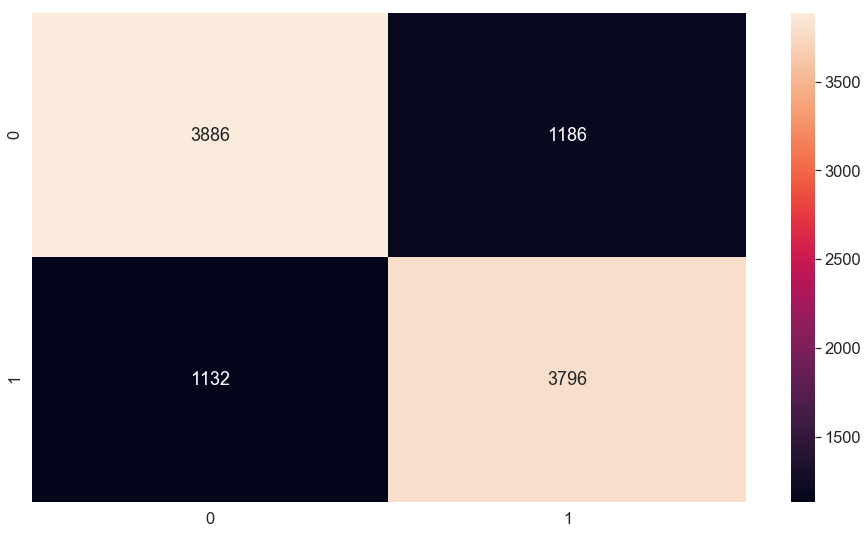

In [56]:
sns.heatmap(confusion_matrix(y_test , classifier.predict(X_test)) , annot=True , fmt='g')

In [57]:
print ('précision du modèle : ' +str(accuracy_score(y_test ,  classifier.predict(X_test))))

précision du modèle : 0.7682


In [58]:
ypred = classifier.predict(X_test)

In [59]:
ypred = pd.DataFrame(ypred , index=y_test.index , columns=['prediction'])

In [60]:
dfp = pd.concat([y_test , ypred] , axis=1)

In [61]:
dfp.head(10)

,enrolled,prediction
239786,1,1
279644,1,1
98290,0,0
170150,1,1
237568,1,1
65042,1,0
207226,1,1
363062,0,0
152296,1,1
64484,0,0


# dernier morceau de code sauvegardera le résultat de notre formation dans 2 fichiers Excel, l’un indiquant les nouveaux clients susceptibles de s’inscrire à votre abonnement et l’autre pour les nouveaux clients susceptibles de ne pas s’inscrire

In [62]:
dfp[dfp['prediction'] == 0].drop('enrolled' , 1).to_csv('might not enroll.csv')
dfp[dfp['prediction'] == 1].drop('enrolled' , 1).to_csv('might enroll.csv')

In [63]:
dfp.drop('enrolled' , 1).head(10)

,prediction
239786,1
279644,1
98290,0
170150,1
237568,1
65042,0
207226,1
363062,0
152296,1
64484,0
